In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

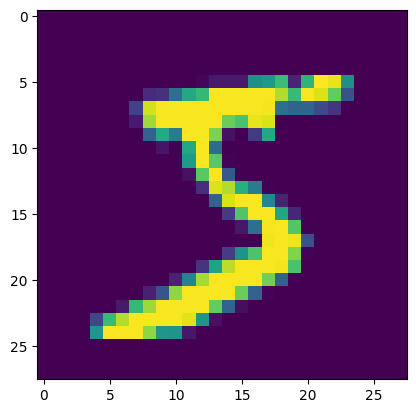

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

Scale down the numbers

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [10]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2828 - accuracy: 0.9199 - val_loss: 0.1568 - val_accuracy: 0.9547
Epoch 2/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1257 - accuracy: 0.9627 - val_loss: 0.1139 - val_accuracy: 0.9674
Epoch 3/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0870 - accuracy: 0.9742 - val_loss: 0.1110 - val_accuracy: 0.9673
Epoch 4/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0645 - accuracy: 0.9809 - val_loss: 0.0914 - val_accuracy: 0.9726
Epoch 5/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0509 - accuracy: 0.9846 - val_loss: 0.0926 - val_accuracy: 0.9723
Epoch 6/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0394 - accuracy: 0.9874 - val_loss: 0.0923 - val_accuracy: 0.9728
Epoch 7/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0308 - accuracy: 0.9908 - val_loss: 0.0871 - val_accuracy:

In [11]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [12]:
y_prob

array([[6.75976843e-21, 1.37733534e-18, 5.08099007e-10, ...,
        1.00000000e+00, 4.57372719e-15, 6.86637433e-14],
       [1.98925791e-18, 1.18566113e-13, 1.00000000e+00, ...,
        8.95084122e-34, 5.67362573e-15, 6.12667731e-30],
       [1.86434378e-13, 9.99878407e-01, 3.89499831e-07, ...,
        1.17799515e-04, 3.36955304e-06, 1.21298622e-11],
       ...,
       [8.14233001e-30, 2.01953776e-24, 1.62850982e-26, ...,
        1.36788706e-14, 1.09762061e-20, 5.36952481e-13],
       [1.95187450e-20, 2.47291178e-21, 1.13229750e-22, ...,
        5.90050596e-18, 4.09900710e-13, 6.78164156e-22],
       [1.24732107e-20, 9.23090473e-30, 2.21731369e-20, ...,
        3.39690347e-26, 1.44499204e-21, 2.41813570e-20]], dtype=float32)

In [13]:
y_pred = y_prob.argmax(axis=1) #gives the index of number whose value is greatest

In [14]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9767

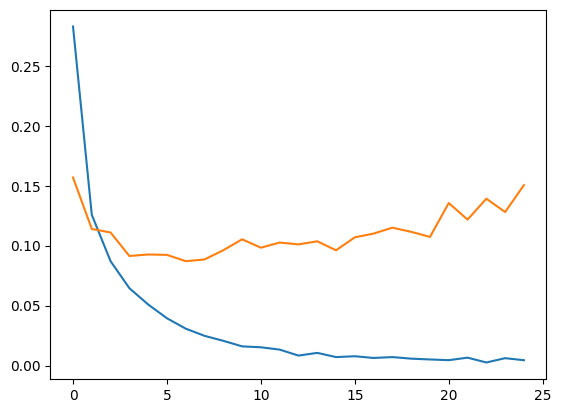

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

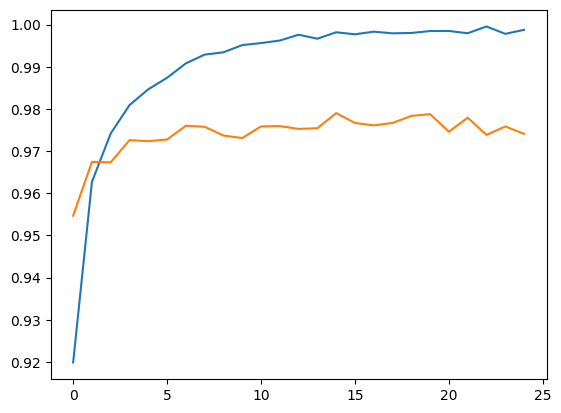

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

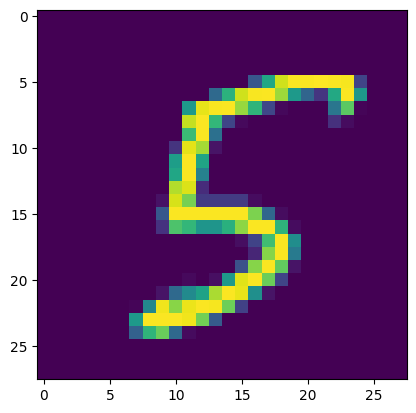

In [18]:
plt.imshow(X_test[23])

In [19]:
y_pred[23]

5

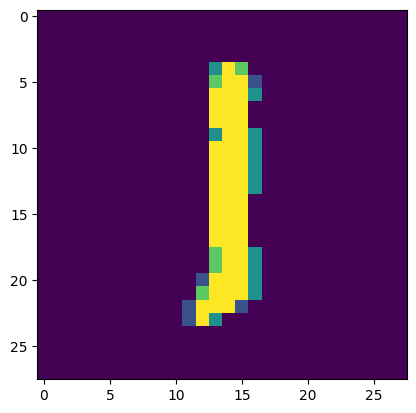

In [24]:
plt.imshow(X_test[14])

In [25]:
y_pred[14]

1